In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dataset_path = 'titanic_modified_dataset.csv'
df = pd.read_csv(dataset_path, index_col='PassengerId')
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
PassengerId,,,,,,,,,
1,3,0,22.0,1,0,7.2500,0,0,0
2,1,1,38.0,1,0,71.2833,1,1,1
3,3,1,26.0,0,0,7.9250,0,2,1
4,1,1,35.0,1,0,53.1000,0,1,1
5,3,0,35.0,0,0,8.0500,0,0,0
...,...,...,...,...,...,...,...,...,...
887,2,0,27.0,0,0,13.0000,0,5,0
888,1,1,19.0,0,0,30.0000,0,2,1
889,3,1,28.0,1,2,23.4500,0,2,0


In [3]:
dataset_arr = df.to_numpy().astype(np.float64)
X, y = dataset_arr[:, :-1], dataset_arr[:, -1]
X, y

(array([[ 3.    ,  0.    , 22.    , ...,  7.25  ,  0.    ,  0.    ],
        [ 1.    ,  1.    , 38.    , ..., 71.2833,  1.    ,  1.    ],
        [ 3.    ,  1.    , 26.    , ...,  7.925 ,  0.    ,  2.    ],
        ...,
        [ 3.    ,  1.    , 28.    , ..., 23.45  ,  0.    ,  2.    ],
        [ 1.    ,  0.    , 26.    , ..., 30.    ,  1.    ,  0.    ],
        [ 3.    ,  0.    , 32.    , ...,  7.75  ,  2.    ,  0.    ]]),
 array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 1., 0.,

In [4]:
intercept = np.ones((X.shape[0], 1))

X_b = np.concatenate((intercept, X), axis = 1)
X_b

array([[ 1.    ,  3.    ,  0.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ..., 71.2833,  1.    ,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  7.925 ,  0.    ,  2.    ],
       ...,
       [ 1.    ,  3.    ,  1.    , ..., 23.45  ,  0.    ,  2.    ],
       [ 1.    ,  1.    ,  0.    , ..., 30.    ,  1.    ,  0.    ],
       [ 1.    ,  3.    ,  0.    , ...,  7.75  ,  2.    ,  0.    ]])

In [5]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X_b, y, test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    shuffle=is_shuffle)

In [6]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [10]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def predict(x, theta):
    z = np.dot(x, theta)
    return sigmoid(z)

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1- 1e-7)
    return -1*(y*np.log(y_hat) + (1- y)*np.log(1 - y_hat)).mean()

def compute_gradient(x, y_hat, y):
    gradient = x.T.dot(y_hat - y)/y.size
    return gradient

def update_theta(theta, gradient, lr):
    return theta - lr*gradient

def compute_accuracy(x, y, theta):
    y_hat = predict(x, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [24]:
lr = 0.01
epochs = 100
batch_size = 16

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [25]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        x_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(x_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(x_i, y_hat, y_i)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')




EPOCH 1:	Training loss : 0.703	Validation loss : 0.599

EPOCH 2:	Training loss : 0.670	Validation loss : 0.582

EPOCH 3:	Training loss : 0.640	Validation loss : 0.567

EPOCH 4:	Training loss : 0.614	Validation loss : 0.555

EPOCH 5:	Training loss : 0.592	Validation loss : 0.544

EPOCH 6:	Training loss : 0.572	Validation loss : 0.535

EPOCH 7:	Training loss : 0.554	Validation loss : 0.528

EPOCH 8:	Training loss : 0.539	Validation loss : 0.522

EPOCH 9:	Training loss : 0.526	Validation loss : 0.517

EPOCH 10:	Training loss : 0.514	Validation loss : 0.513

EPOCH 11:	Training loss : 0.504	Validation loss : 0.509

EPOCH 12:	Training loss : 0.495	Validation loss : 0.507

EPOCH 13:	Training loss : 0.487	Validation loss : 0.505

EPOCH 14:	Training loss : 0.480	Validation loss : 0.503

EPOCH 15:	Training loss : 0.474	Validation loss : 0.502

EPOCH 16:	Training loss : 0.468	Validation loss : 0.501

EPOCH 17:	Training loss : 0.463	Validation loss : 0.500

EPOCH 18:	Training loss : 0.459	Validat

Text(0.5, 1.0, 'Validation Accuracy')

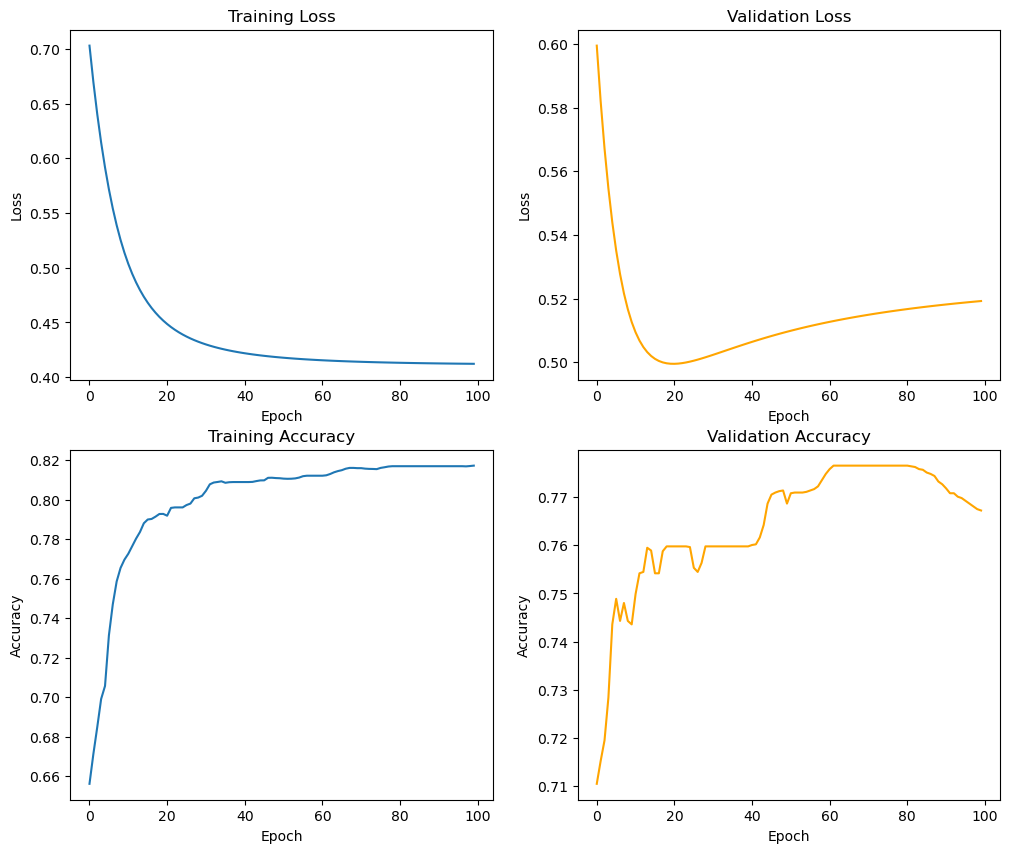

In [26]:
fid, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0 , 1].plot( val_losses , 'orange')
ax[0 , 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs, 'orange')
ax[1 , 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

In [27]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.770949720670391
Accuracy : 0.7752808988764045


### Twitter Sentiment Analysis

In [28]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import TweetTokenizer
from collections import defaultdict

In [29]:
dataset_path = 'sentiment_analysis.csv'
df = pd.read_csv(dataset_path, index_col='id')

In [30]:
def text_normalize(text):

    text = re.sub(r'^RT[\s]+', '', text)

    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    text = re.sub(r'#','', text)

    text = re.sub(r'[^\w\s]', '', text)

    tokenizer = TweetTokenizer(
        preserve_case=False,
        strip_handles=True,
        reduce_len=True
    )
    text_tokens = tokenizer.tokenize(text)
    return text_tokens

In [31]:
def get_freqs(df):
    freqs = defaultdict(lambda:0)
    for idx, row in df.iterrows():
        tweet = row['tweet']
        label = row['label']

        tokens = text_normalize(tweet)
        for token in tokens:
            pair = (token, label)
            freqs[pair] += 1

    return freqs

In [32]:
def get_feature(text, freqs):
    tokens = text_normalize(text)

    X = np.zeros(3)
    X[0] = 1

    for token in tokens:
        X[1] += freqs[(token, 0)]
        X[2] += freqs[(token, 1)]

    return X

In [33]:
X = []
y = []

freqs = get_freqs(df)

for idx, row in df.iterrows():
    tweet = row['tweet']
    label = row['label']

    X_i = get_feature(tweet, freqs)
    X.append(X_i)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [35]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=val_size,
                                                  random_state=random_state,
                                                  shuffle=is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, 
                                                    test_size=test_size,
                                                    random_state=random_state,
                                                    shuffle=is_shuffle)

In [36]:
normalizer = StandardScaler()

X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

In [37]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def predict(x, theta):
    z = np.dot(x, theta)
    return sigmoid(z)

def compute_loss(y_hat, y):
    y_hat = np.clip(y_hat, 1e-7, 1- 1e-7)
    return -1*(y*np.log(y_hat) + (1- y)*np.log(1 - y_hat)).mean()

def compute_gradient(x, y_hat, y):
    gradient = x.T.dot(y_hat - y)/y.size
    return gradient

def update_theta(theta, gradient, lr):
    return theta - lr*gradient

def compute_accuracy(x, y, theta):
    y_hat = predict(x, theta).round()
    acc = (y_hat == y).mean()

    return acc

In [38]:
lr = 0.01
epochs = 200
batch_size = 128

np.random.seed(random_state)
theta = np.random.uniform(size=X_train.shape[1])

In [39]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        x_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]

        y_hat = predict(x_i, theta)
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(x_i, y_hat, y_i)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)

        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
    
    train_batch_loss = sum(train_batch_losses)/len(train_batch_losses)
    train_batch_acc = sum(train_batch_accs)/len(train_batch_accs)
    val_batch_loss = sum(val_batch_losses)/len(val_batch_losses)
    val_batch_acc = sum(val_batch_accs)/len(val_batch_accs)

    train_losses.append(train_batch_loss)
    train_accs.append(train_batch_acc)
    val_losses.append(val_batch_loss)
    val_accs.append(val_batch_acc)

    print (f'\nEPOCH { epoch + 1}:\tTraining loss : { train_batch_loss :.3f}\tValidation loss : { val_batch_loss :.3f}')




EPOCH 1:	Training loss : 0.707	Validation loss : 0.704

EPOCH 2:	Training loss : 0.661	Validation loss : 0.659

EPOCH 3:	Training loss : 0.624	Validation loss : 0.622

EPOCH 4:	Training loss : 0.594	Validation loss : 0.591

EPOCH 5:	Training loss : 0.569	Validation loss : 0.566

EPOCH 6:	Training loss : 0.548	Validation loss : 0.546

EPOCH 7:	Training loss : 0.531	Validation loss : 0.528

EPOCH 8:	Training loss : 0.516	Validation loss : 0.514

EPOCH 9:	Training loss : 0.504	Validation loss : 0.502

EPOCH 10:	Training loss : 0.494	Validation loss : 0.491

EPOCH 11:	Training loss : 0.485	Validation loss : 0.483

EPOCH 12:	Training loss : 0.477	Validation loss : 0.475

EPOCH 13:	Training loss : 0.471	Validation loss : 0.468

EPOCH 14:	Training loss : 0.465	Validation loss : 0.463

EPOCH 15:	Training loss : 0.460	Validation loss : 0.457

EPOCH 16:	Training loss : 0.456	Validation loss : 0.453

EPOCH 17:	Training loss : 0.452	Validation loss : 0.449

EPOCH 18:	Training loss : 0.448	Validat

Text(0.5, 1.0, 'Validation Accuracy')

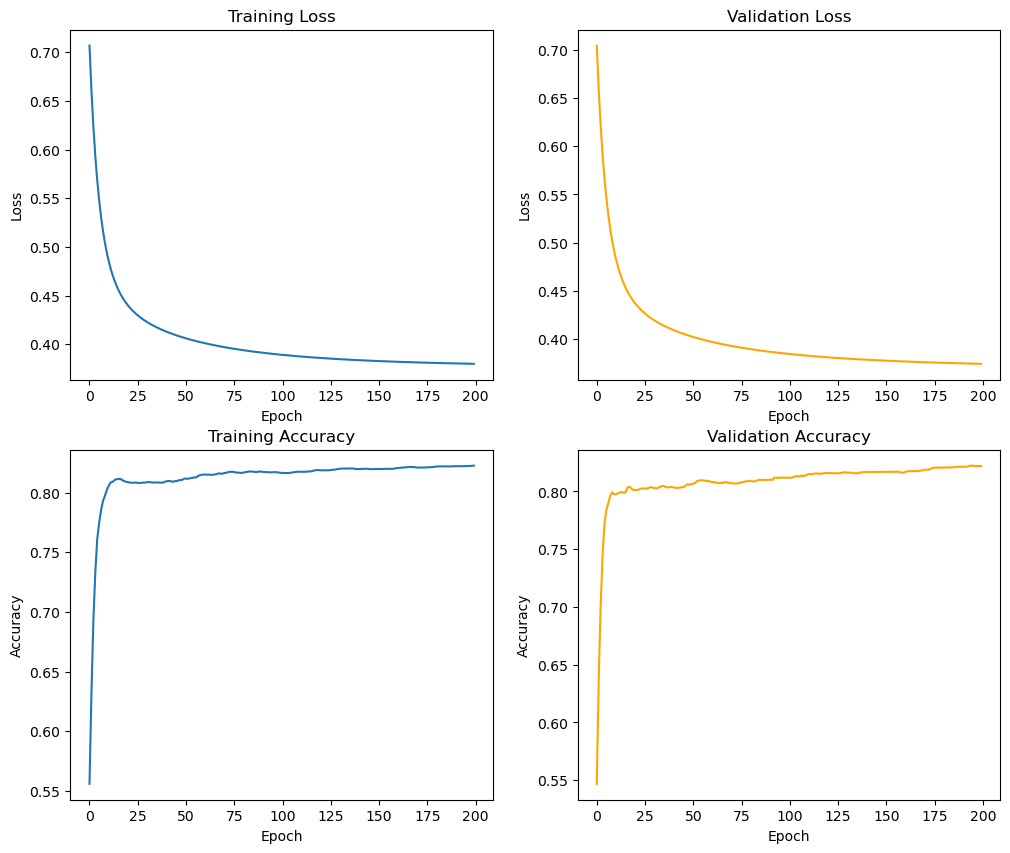

In [40]:
fid, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0 , 1].plot( val_losses , 'orange')
ax[0 , 1].set(xlabel ='Epoch', ylabel ='Loss')
ax[0 , 1].set_title('Validation Loss')

ax[1 , 0].plot(train_accs)
ax[1 , 0].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 0].set_title('Training Accuracy')

ax[1 , 1].plot(val_accs, 'orange')
ax[1 , 1].set(xlabel ='Epoch', ylabel ='Accuracy')
ax[1 , 1].set_title('Validation Accuracy')

In [41]:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.821969696969697
Accuracy : 0.8434343434343434


### Exercises

In [42]:
X_e = np.array([[22.3, -1.5, 1.1, 1]])
theta_e = np.array([0.1, -0.15, 0.3, -0.2])

print(predict(X_e, theta_e))

[0.92988994]


In [44]:
y_e = np.array([1, 0, 0, 1])
y_hat_e = np.array([0.8, 0.75, 0.3, 0.95])
print(round(compute_loss(y_hat_e, y_e), 3))

0.504


In [45]:
X_e = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
y_true_e = np.array([0, 1, 0, 1])
y_pred = np.array([0.25, 0.75, 0.4, 0.8])

print(compute_gradient(X_e, y_pred, y_true_e))

[-0.0625  0.0625]


In [46]:
def compute_accuracy (y_true , y_pred ) :
    y_pred_rounded = np. round ( y_pred )
    accuracy = np. mean ( y_true == y_pred_rounded )
    return accuracy
y_true = [1, 0, 1, 1]
y_pred = [0.85, 0.35, 0.9, 0.75]
print(compute_accuracy(y_true, y_pred))

1.0


In [48]:
X = np.array([[1, 3], [2, 1], [3, 2], [1, 2]])
y_true = np.array([1, 0, 1, 1])
y_pred = np.array([0.7, 0.4, 0.6, 0.85])

print(compute_gradient(X, y_pred, y_true))

[-0.2125 -0.4   ]
